## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

## Loading our CTR data

In [2]:
data=pd.read_csv(r"C:\Users\siddhant\Downloads\clicks.csv")
data.head()

,product,banner_clicked
0,A,0
1,B,0
2,A,0
3,B,0
4,A,0


In [3]:
data.shape


(10000, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         10000 non-null  object
 1   banner_clicked  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [5]:
data.describe()

,banner_clicked
count,10000.000000
mean,0.123400
std,0.328912
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
# total people who saw each product ad
data.groupby('product').count()

,banner_clicked
product,
A,5028
B,4972


In [11]:
# no. of people clicked the banner for each product ad
data.groupby('product').sum('banner_clicked')

,banner_clicked
product,
A,654
B,580


## Ploting the bar chart

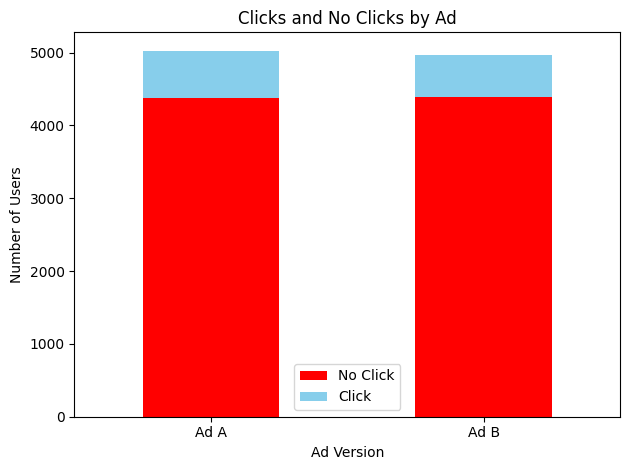

In [14]:
click_counts = data.groupby(['product', 'banner_clicked']).size().unstack(fill_value=0)

# Rename columns for clarity
click_counts.columns = ['No Click', 'Click']

# Plot stacked bar chart
click_counts.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.title("Clicks and No Clicks by Ad")
plt.xlabel("Ad Version")
plt.ylabel("Number of Users")
plt.xticks([0, 1], ['Ad A', 'Ad B'], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

## Parameters of the model

In [15]:
alpha = 0.05 # 5% - significance level
delta = 0.1 # 10 percent minimum detectable effect 

## Calculate total no. of clicks per group 

In [19]:
# Calculate total no. of people who saw this product ad
a_total = data[data['product']=='A'].count()
b_total = data[data['product']=='B'].count()
print("no. of people who saw product A: ",a_total)
print("no. of people who saw product B: ",b_total)

# calculate total no. of click per group
a_clicks = data.groupby('product')['banner_clicked'].sum().loc['A']
b_clicks = data.groupby('product')['banner_clicked'].sum().loc['B']
print("no. of clicks in product A: ",a_clicks)
print("no. of clicks in product B: ",b_clicks)

no. of people who saw product A:  product           5028
banner_clicked    5028
dtype: int64
no. of people who saw product B:  product           4972
banner_clicked    4972
dtype: int64
no. of clicks in product A:  654
no. of clicks in product B:  580


## Calculate Pool Estimates for clicks per product

In [23]:
p_a_hat=a_clicks/a_total
p_b_hat=b_clicks/b_total
print('click probability in product A: ',p_a_hat)
print('click probability in product B: ',p_b_hat)

#computing estimate of pooled clicked probability 
p_pooled_hat=(a_clicks+b_clicks)/(a_total+b_total)
print('pooled click probability: ',p_pooled_hat)

click probability in product A:  product           0.130072
banner_clicked    0.130072
dtype: float64
click probability in product B:  product           0.116653
banner_clicked    0.116653
dtype: float64
pooled click probability:  product           0.1234
banner_clicked    0.1234
dtype: float64


## Calculating Pooled Variance

In [24]:
pooled_variance= p_pooled_hat * (1-p_pooled_hat)*(1/a_total + 1/b_total)
print('pooled variance is :',pooled_variance)

pooled variance is : product           0.000043
banner_clicked    0.000043
dtype: float64


  ## Calculating standard error and test statistics

In [26]:
SE= np.sqrt(pooled_variance)
print('Standard Error is : ',SE)

test_stat=(p_a_hat-p_b_hat)/SE
print('Test Statistics is : ',test_stat)

z_crit=norm.ppf(1-alpha/2)
print('Z critical value from standard normal distribution : ',z_crit)


Standard Error is :  product           0.006578
banner_clicked    0.006578
dtype: float64
Test Statistics is :  product           2.039876
banner_clicked    2.039876
dtype: float64
Z critical value from standard normal distribution :  1.959963984540054


## Calculating p values for the z-test

In [38]:
p_value = 2 * norm.sf(abs(test_stat))
p_value=round(p_value[0],3)
print('p_value is :',p_value)
if p_value<=alpha:
        print('There is statistical significance indicating differences in the groups are unlikely due to chance ')
else :
        print(' There is no statistical significance indicating  differences are likely due to chance')



p_value is : 0.041
There is statistical significance indicating differences in the groups are unlikely due to chance 


## Calculate Confidence Interval of the test

In [42]:
CI=[
    round((p_a_hat-p_b_hat)-SE*z_crit,3), #lower bound of CI
     round((p_a_hat-p_b_hat)+SE*z_crit,3)  #Upper bound of CI
]

print('Lower bound of Confidence Interval of the 2 sample z test is:',CI[0])
print('Upper bound of Confidence Interval of the 2 sample z test is:',CI[1])

Lower bound of Confidence Interval of the 2 sample z test is: product           0.001
banner_clicked    0.001
dtype: float64
Upper bound of Confidence Interval of the 2 sample z test is: product           0.026
banner_clicked    0.026
dtype: float64


## Testing for practical significance for A/B Testing


In [49]:


if delta<=CI[0]['product']:
    print('We have practical significance ! with MDE as: ',delta )
else : 
    print('We do not have practical significance')

We do not have practical significance


## Business Insights

**1) Conversion Rates:**
    Ad A had a click-through (conversion) rate of 13%.
    Ad A had a click-through (conversion) rate of 11%.

**2) Statistical Significance:**
     A Z-test was conducted to compare the conversion rates of Ad A and Ad B.
     The p value of 0.041 was found to be <0.05,, indicating that the difference between the two ads is statistically significant (not due to random chance).
     
**3) Practical Significance**
     With a Minimum Detectable Effect (MDE) of 0.1 and a confidence interval lower bound of 0.001, the difference between Ad A and B does not meet the practical significance threshold.

## Result

**Stick with ad A:**
  Even though there might be a small improvement, it’s not practically large enough to confidently switch campaigns or invest further in Ad B.